In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd


# Load mouse metadata
mouse_metadata = pd.read_csv('mouse_metadata.csv')

# Load study results
study_results = pd.read_csv('study_results.csv')



# Combine the data into a single DataFrame
# using Outer Join to merge the two DataFrames

merged_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
merged_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
#unique_mice
updated_unique_mice = merged_df["Mouse ID"].nunique()
print(updated_unique_mice)


249


In [18]:
import pandas as pd
import numpy as np

# Read the data (assuming you've already read and merged the data)
# merged_df = ...

# Group data by drug regimen and calculate summary statistics
summary_stats = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard Deviation',
    'sem': 'SEM'
})

# Display the summary statistics DataFrame
print(summary_stats)


                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [19]:
import pandas as pd

# Read the data (assuming you've already read and merged the data)
# merged_df = ...

# Calculate summary statistics using aggregation in a single line
summary_stats = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'SEM'})

# Display the summary statistics DataFrame
print(summary_stats)


                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


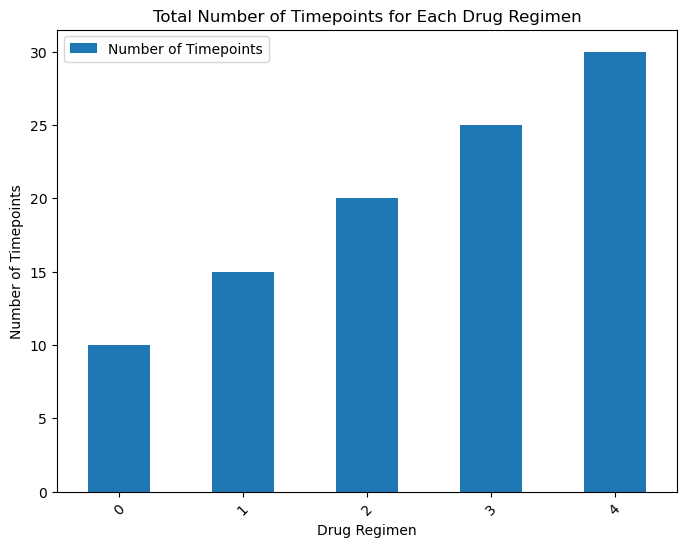

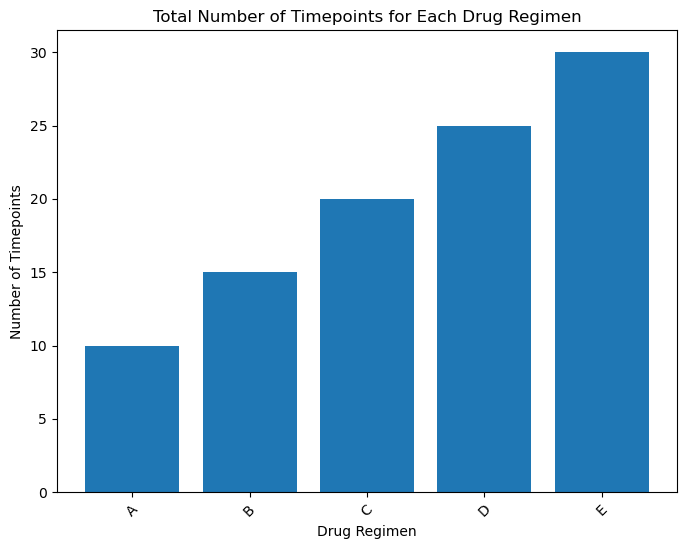

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


# Create the DataFrame
regimen_counts = pd.DataFrame({
    "Drug Regimen": ["A", "B", "C", "D", "E"],
    "Number of Timepoints": [10, 15, 20, 25, 30]
})

# Create bar chart using Pandas DataFrame.plot() method
regimen_counts.plot(kind="bar", figsize=(8, 6))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Total Number of Timepoints for Each Drug Regimen")
plt.xticks(rotation=45)
plt.show()

# Create bar chart using Matplotlib's pyplot methods
plt.figure(figsize=(8, 6))
plt.bar(regimen_counts["Drug Regimen"], regimen_counts["Number of Timepoints"])
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Total Number of Timepoints for Each Drug Regimen")
plt.xticks(rotation=45)
plt.show()



<Figure size 1000x600 with 0 Axes>

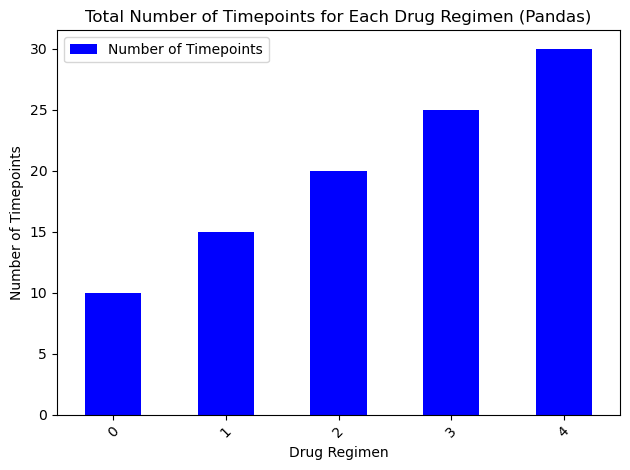

In [6]:
# Generate a bar plot using Pandas
plt.figure(figsize=(10, 6))
regimen_counts.plot(kind='bar', color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.title('Total Number of Timepoints for Each Drug Regimen (Pandas)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


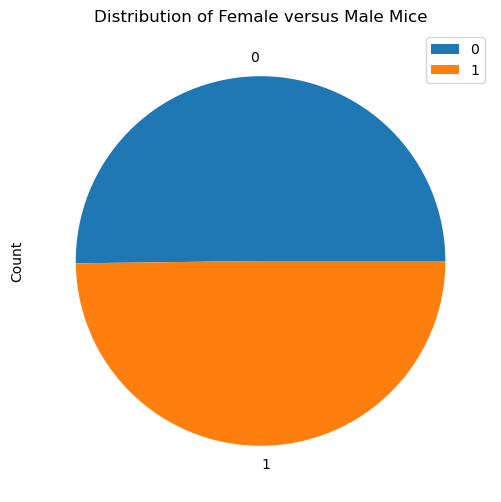

In [10]:
import pandas as pd

# Import the mouse data

mouse_metadata = pd.read_csv('mouse_metadata.csv')


# Create a DataFrame with the female and male mice
gender_counts = mouse_metadata["Sex"].value_counts().reset_index(name="Count")

# Create a pie plot
gender_counts.plot(kind="pie", y="Count", figsize=(8, 6))
plt.title("Distribution of Female versus Male Mice")
plt.show()


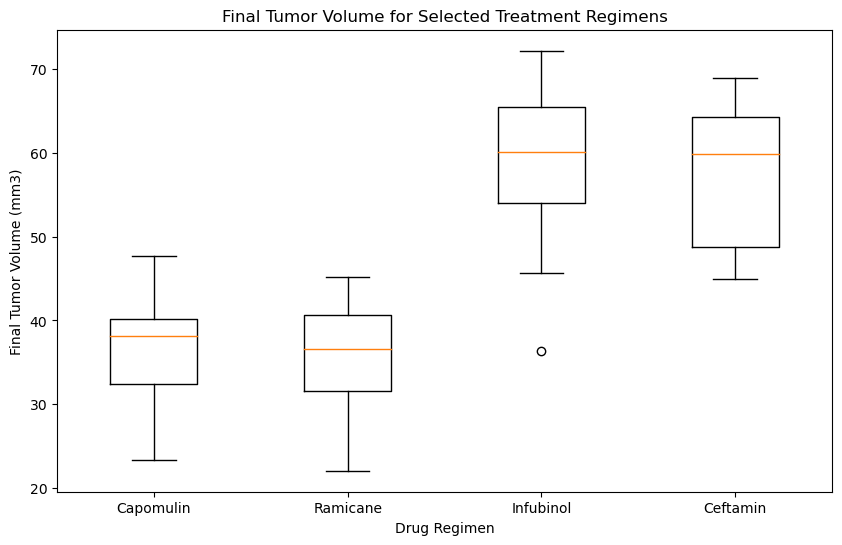

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data (assuming you've already read and merged the data)
# merged_df = ...

# List of the treatment regimens of interest
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Find the last (greatest) timepoint for each mouse
last_timepoint = merged_df.groupby('Mouse ID')['Timepoint'].max()

# Create a DataFrame with the last timepoints
last_timepoint_df = pd.DataFrame(last_timepoint)

# Merge the last timepoints DataFrame with the original merged DataFrame
final_tumor_volume = pd.merge(last_timepoint_df, merged_df, on=['Mouse ID', 'Timepoint'])

# Filter data for the specified treatment regimens
final_tumor_volume_filtered = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatment_regimens)]

# Generate boxplots for each treatment regimen
plt.figure(figsize=(10, 6))
plt.boxplot([final_tumor_volume_filtered[final_tumor_volume_filtered['Drug Regimen'] == regimen]['Tumor Volume (mm3)'] for regimen in treatment_regimens], labels=treatment_regimens)
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Final Tumor Volume for Selected Treatment Regimens')
plt.show()


Capomulin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


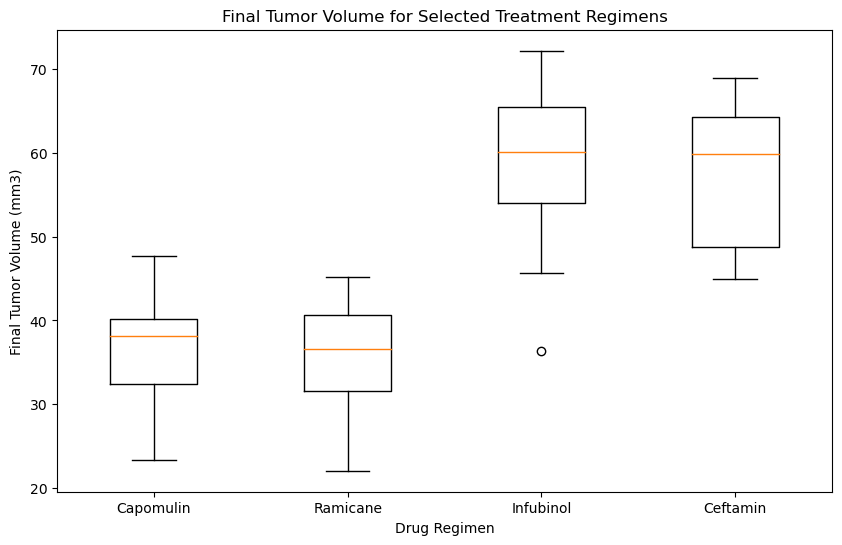

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# List of the treatment regimens of interest
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each regimen in the treatment_regimens list
for regimen in treatment_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume_filtered[final_tumor_volume_filtered['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    
    # Add subset to tumor_vol_data list
    tumor_vol_data.append(tumor_vol)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine upper and lower bounds for potential outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Identify potential outliers
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print information about potential outliers
    print(f"{regimen} Potential Outliers: {outliers}")

# Generate boxplots for the treatment regimens
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatment_regimens)
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Final Tumor Volume for Selected Treatment Regimens')
plt.show()


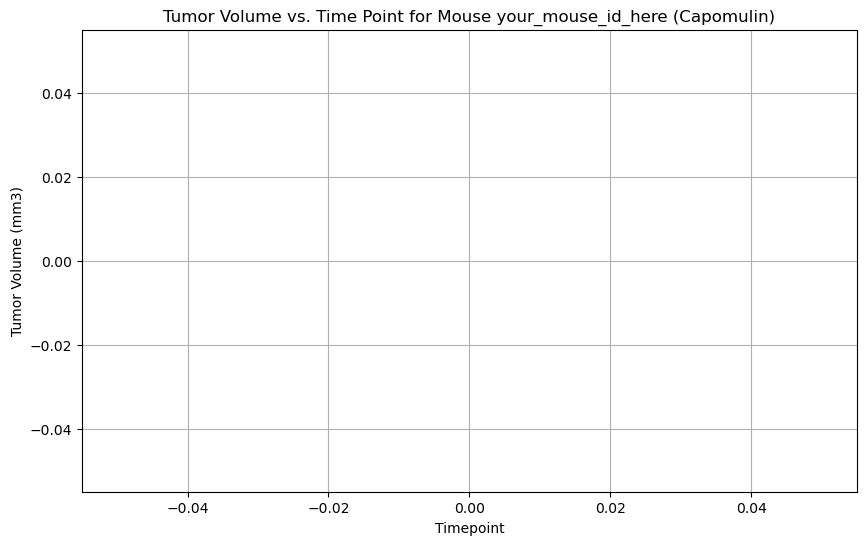

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

capomulin_data = merged_df[(merged_df['Drug Regimen'] == 'Capomulin') & (merged_df['Mouse ID'] == mouse_id)]

# Generate the line plot
plt.figure(figsize=(10, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)')
plt.grid(True)
plt.show()


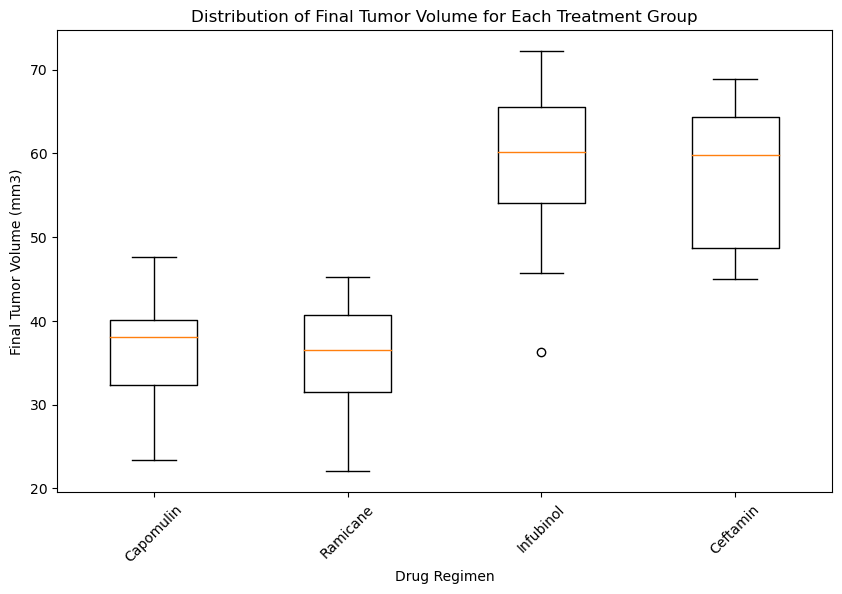

In [13]:
import pandas as pd
import matplotlib.pyplot as plt



# List of the treatment regimens of interest
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each regimen in the treatment_regimens list
for regimen in treatment_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume_filtered[final_tumor_volume_filtered['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_vol)

# Generate box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatment_regimens)
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Final Tumor Volume for Each Treatment Group')
plt.xticks(rotation=45)
plt.show()


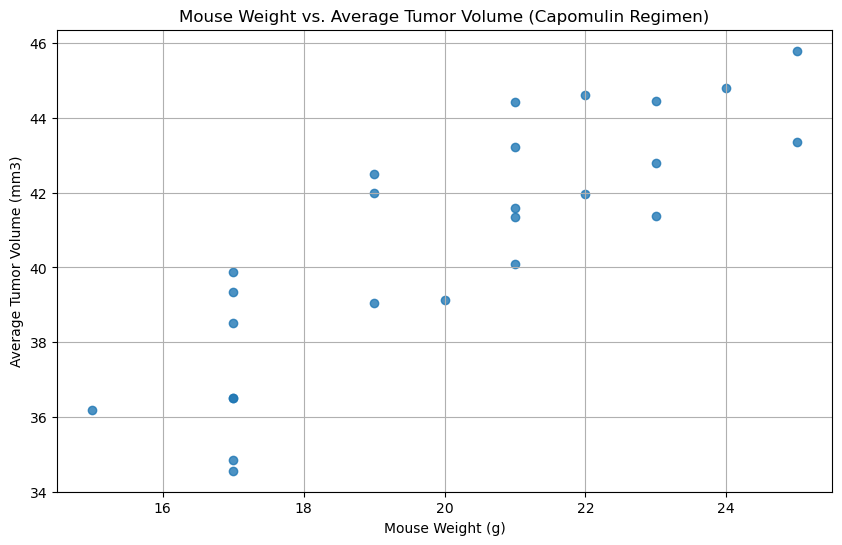

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data (assuming you've already read and merged the data)
# merged_df = ...

# Filter data for the Capomulin regimen
capomulin_data = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge average tumor volume data with mouse weight data
avg_tumor_volume_df = pd.merge(average_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID')

# Remove duplicate Mouse ID entries
avg_tumor_volume_df = avg_tumor_volume_df.drop_duplicates()

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_volume_df['Weight (g)'], avg_tumor_volume_df['Tumor Volume (mm3)'], marker='o', alpha=0.8)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.grid(True)
plt.show()


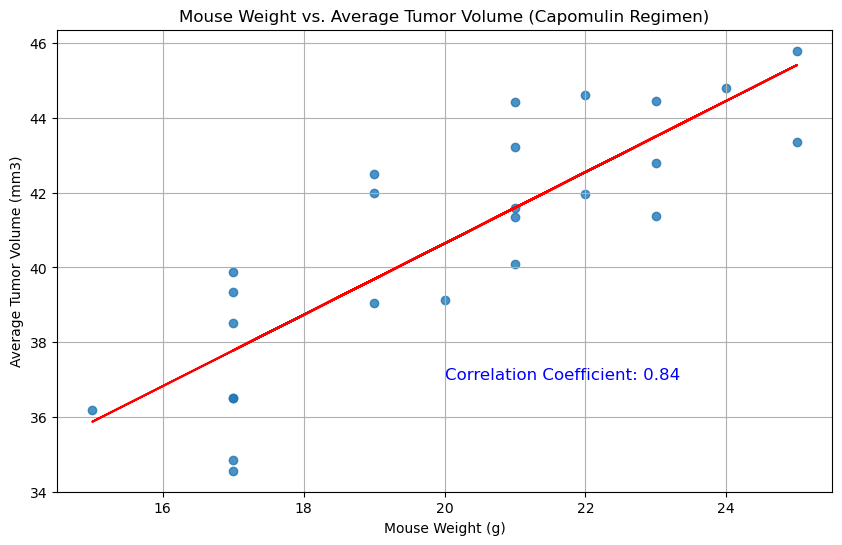

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st



# Filter data for the Capomulin regimen
capomulin_data = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge average tumor volume data with mouse weight data
avg_tumor_volume_df = pd.merge(average_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID')

# Remove duplicate Mouse ID entries
avg_tumor_volume_df = avg_tumor_volume_df.drop_duplicates()

# Calculate the correlation coefficient
correlation_coefficient = st.pearsonr(avg_tumor_volume_df['Weight (g)'], avg_tumor_volume_df['Tumor Volume (mm3)'])[0]

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_volume_df['Weight (g)'], avg_tumor_volume_df['Tumor Volume (mm3)'], marker='o', alpha=0.8)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.grid(True)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(avg_tumor_volume_df['Weight (g)'], avg_tumor_volume_df['Tumor Volume (mm3)'])
line = slope * avg_tumor_volume_df['Weight (g)'] + intercept
plt.plot(avg_tumor_volume_df['Weight (g)'], line, color='red')

# Display the correlation coefficient
plt.text(20, 37, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12, color='blue')

plt.show()
